In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler


In [2]:
# Import necessary libraries
import pandas as pd

# Read the CSV file (ensure the correct filename)
data = pd.read_csv('/content/Walmart DataSet.csv')  # Replace with the correct path if needed

# Display the first few rows
print(data.head())

# Check data info
print(data.info())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())
data['Fuel_Price'] = data['Fuel_Price'].fillna(data['Fuel_Price'].mean())
data['CPI'] = data['CPI'].fillna(data['CPI'].mean())
data['Unemployment'] = data['Unemployment'].fillna(data['Unemployment'].mean())
print(data.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Walmart DataSet.csv")

# Convert 'Date' column to datetime format with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract year and month for further analysis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Detect and handle outliers in 'Weekly_Sales' using the IQR method
# Calculate IQR
Q1 = data['Weekly_Sales'].quantile(0.25)  # First quartile
Q3 = data['Weekly_Sales'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                             # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
data_no_outliers = data[(data['Weekly_Sales'] >= lower_bound) & (data['Weekly_Sales'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print(f"Original data size: {data.shape[0]}")
print(f"Data size after removing outliers: {data_no_outliers.shape[0]}")

# Optional: Save the cleaned data for future use
data_no_outliers.to_csv("Cleaned_Walmart_DataSet.csv", index=False)

# Verify the cleaned data
print(data_no_outliers.describe())


Original data size: 6435
Data size after removing outliers: 6401
             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6401.000000                           6401  6.401000e+03   6401.000000   
mean     23.054210  2011-06-17 04:24:33.519762432  1.036130e+06      0.068895   
min       1.000000            2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-08 00:00:00  5.517431e+05      0.000000   
50%      23.000000            2011-06-17 00:00:00  9.572983e+05      0.000000   
75%      34.000000            2012-02-24 00:00:00  1.414565e+06      0.000000   
max      45.000000            2012-10-26 00:00:00  2.685352e+06      1.000000   
std      12.991284                            NaN  5.451961e+05      0.253296   

       Temperature   Fuel_Price          CPI  Unemployment         Year  \
count  6401.000000  6401.000000  6401.000000   6401.000000  6401.000000   
mean     60.772042     3.359634   171.642219      8.002

In [7]:
!pip install seaborn


In [8]:
import seaborn as sns


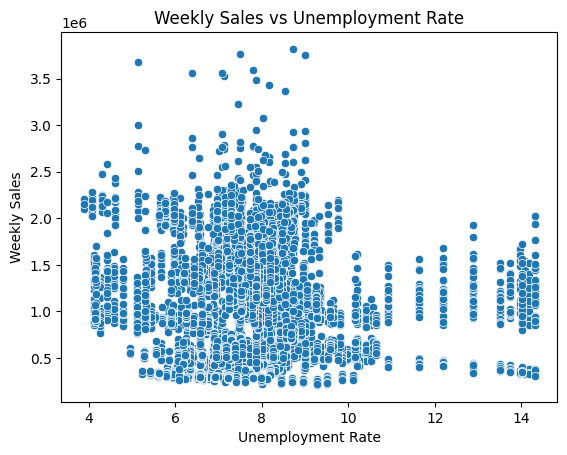

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between Weekly Sales and Unemployment
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title("Weekly Sales vs Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()


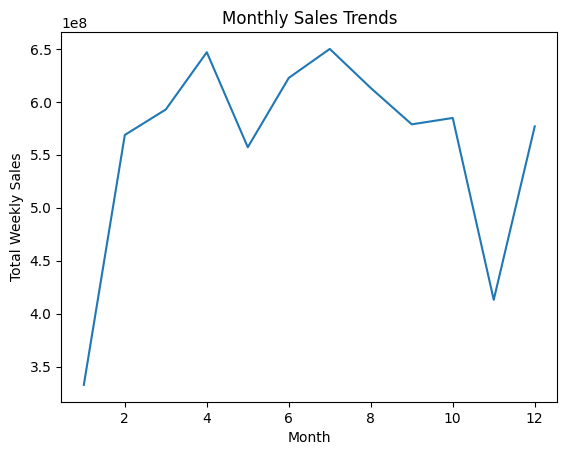

In [10]:
# Plot sales across months
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Weekly Sales")
plt.show()


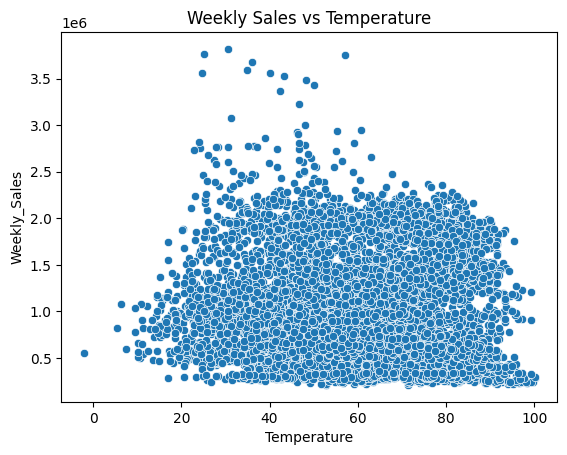

In [11]:
# Correlation between Weekly Sales and Temperature
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title("Weekly Sales vs Temperature")
plt.show()


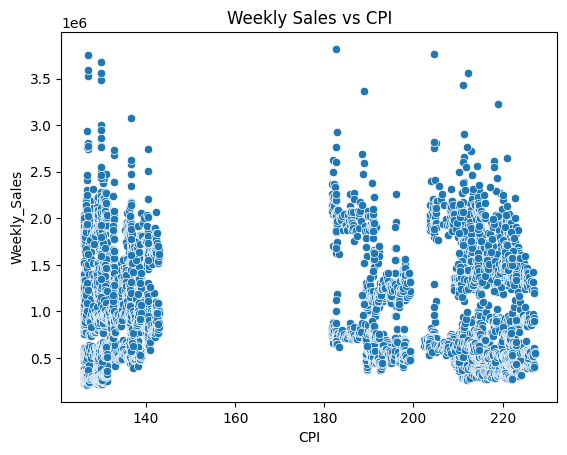

In [12]:
# Correlation between Weekly Sales and CPI
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title("Weekly Sales vs CPI")
plt.show()


In [13]:
# Find top-performing stores
store_performance = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(store_performance.head())


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [14]:
# Find worst-performing stores
print(store_performance.tail())

# Performance difference
performance_diff = store_performance.max() - store_performance.min()
print(f"Difference between best and worst stores: {performance_diff}")


Store
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: Weekly_Sales, dtype: float64
Difference between best and worst stores: 264237570.49999997


In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is already preprocessed and contains the necessary features
X = data[['Lag_1', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]
y = data['Weekly_Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can proceed with model training and evaluation


In [18]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Optionally: Evaluate the model (e.g., using Mean Absolute Error, R-squared, etc.)
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 97667.30039190338
R-squared: 0.8970128124642174


In [19]:
# Forecasting for the next 12 weeks (assume future lag data is available)
future_weeks = X_test.iloc[:12].copy()  # Example: Replace with actual future data
future_predictions = model.predict(future_weeks)

# Display predictions
print("Next 12 Weeks Sales Forecast:")
print(future_predictions)


Next 12 Weeks Sales Forecast:
[1139127.31577359 1293658.82680153 1725098.34711263 1084954.1255149
  462561.67701281 1009024.38742402 1417634.53401089 1012242.73600425
 1901816.80046346  959128.4153039   705937.16111628  547136.83374887]


In [21]:
# Re-initialize models (if they have been cleared from memory)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Reinitialize the models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate performance
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Evaluate performance
    r2 = model.score(X_test, y_test)
    print(f'{model_name} R-squared: {r2:.2f}')


Linear Regression R-squared: 0.90
Decision Tree R-squared: 0.86
Random Forest R-squared: 0.92
Gradient Boosting R-squared: 0.93


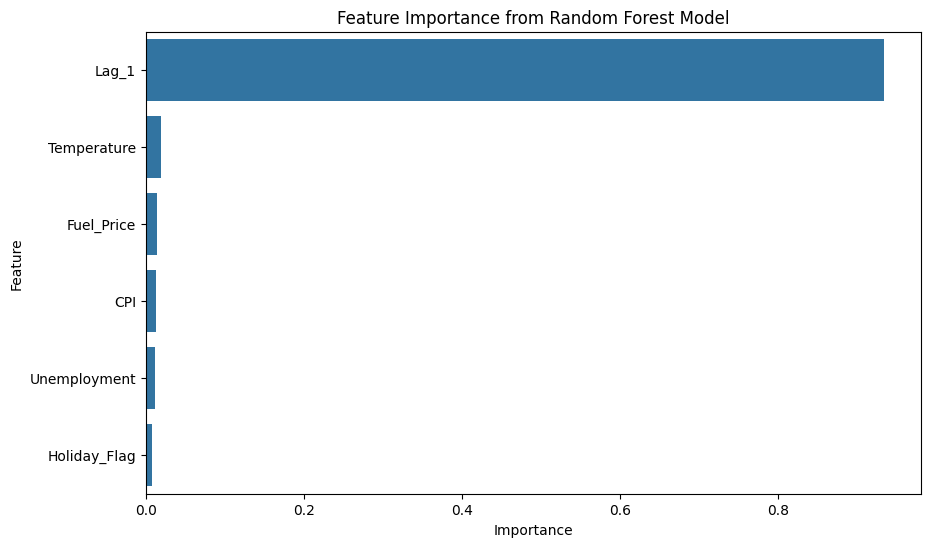

In [22]:
# Feature Importance from Random Forest
random_forest = models['Random Forest']
feature_importances = random_forest.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()


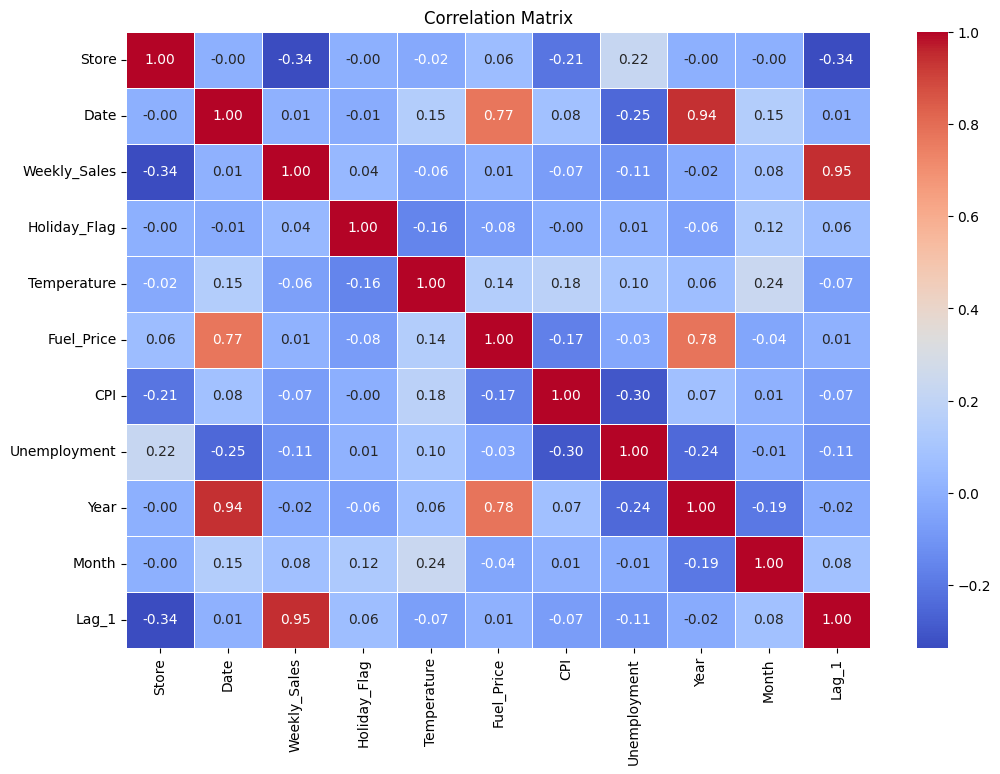

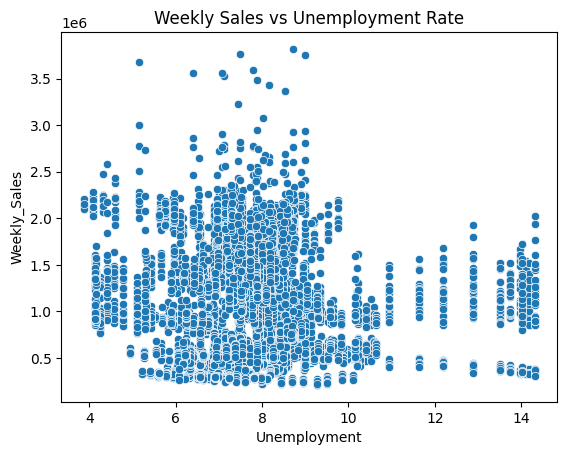

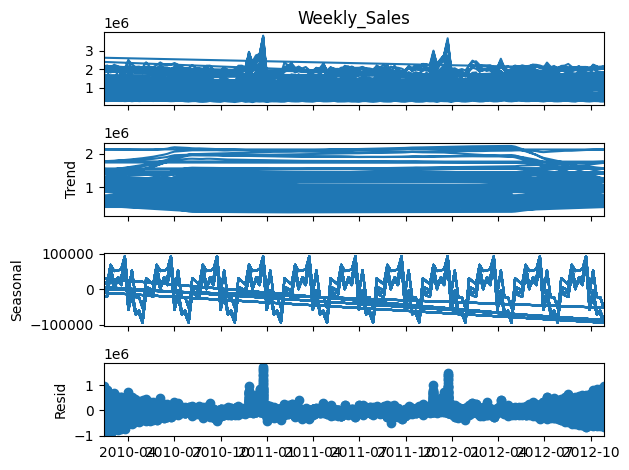

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between Unemployment and Weekly Sales
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title("Weekly Sales vs Unemployment Rate")
plt.show()

# Seasonal Decomposition of Weekly_Sales (using 'Date' as index)
data.set_index('Date', inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series
decomposition = seasonal_decompose(data['Weekly_Sales'], model='additive', period=52)  # Period of 52 for weekly data
decomposition.plot()
plt.show()
